In [217]:
import pandas as pd
import numpy as np

## Import and store the data in a data frame.

In [218]:
#Function to parse the raw record in data file and to store it in the form of a list.
def parseLine(line):
    city1 = line[:4].strip(' ')
    city2 = line[4:7].strip(' ')
    avgFare = line[11:17].strip(' ')
    distance = line[19:23].strip(' ')
    awp = line[26:33].strip(' ')
    mla = line[35:37].strip(' ')
    ms = line[40:45].strip(' ')
    averageFare = line[48:54].strip(' ')
    lpa = line[56:58].strip(' ')
    marketShare = line[61:66].strip(' ')
    price = line[69:75].strip(' ')
    dataList = [city1,city2,avgFare,distance,awp,mla,ms,averageFare,lpa,marketShare,price]
    return dataList

In [219]:
#Reading data file. 
f=open('airq402.dat','r')
column_nm=['City1','City2','Average Fare','Distance','Average Weekly Passengers','Market Leading Airline','Market Share',
        'Average fare','Low Price Airline','market share','Price']
#Iterating through the records in data file and storing earch record in list of list.
data = []
for line in f: 
    a = parseLine(line)
    data.append(a)

#Converting list of lisy into dataframe.
df = pd.DataFrame(data, columns=column_nm)

In [220]:
#Displaying the top 5 elements in the list.
df.head(5)

,City1,City2,Average Fare,Distance,Average Weekly Passengers,Market Leading Airline,Market Share,Average fare,Low Price Airline,market share,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [221]:
#Changing the datatype of all columns which are numeric in nature.
df[['Average Fare','Distance','Average Weekly Passengers',
    'Market Share','Average fare','market share','Price']] = df[['Average Fare','Distance','Average Weekly Passengers',
      'Market Share','Average fare','market share','Price']].apply(pd.to_numeric)

In [222]:
df.describe()

,Average Fare,Distance,Average Weekly Passengers,Market Share,Average fare,market share,Price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


## Remove the outliers from the data 

In [223]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [224]:
df = remove_outlier(df, 'Distance')
df = remove_outlier(df, 'Average Weekly Passengers')
df = remove_outlier(df, 'Market Share')
df = remove_outlier(df, 'Average fare')
df = remove_outlier(df, 'market share')
df = remove_outlier(df, 'Price')

In [225]:
df.shape

(882, 11)

In [226]:
pd.unique(df.City1)

array(['CAK', 'ALB', 'ABQ', 'AMA', 'ATL', 'ACY', 'AUS', 'BWI', 'BHM',
       'BOI', 'BOS', 'BUF', 'BUR', 'BTV', 'CHS', 'CLT', 'ORD', 'CVG',
       'CLE', 'COS', 'CAE', 'CMH', 'CRP', 'DFW', 'DAY', 'DEN', 'DSM',
       'DTW', 'ELP', 'EUG', 'FNT', 'FLL', 'RSW', 'GRR', 'GSO', 'GSP',
       'GPT', 'HRL', 'MDT', 'BDL', 'IAH', 'IND', 'PSP', 'JAX', 'MCI',
       'TYS', 'LAS', 'LIT', 'LGB', 'ISP', 'LAX', 'SDF', 'MSN', 'MHT',
       'MEM', 'MIA', 'MKE', 'MSP', 'MYR', 'BNA', 'MSY', 'PHF', 'LGA',
       'ORF', 'OAK', 'OKC', 'OMA', 'ONT', 'MCO', 'PHL', 'PHX', 'PIT',
       'PDX', 'PVD', 'RDU', 'RNO', 'ROC', 'SMF', 'STL', 'SLC', 'SAT',
       'SAN', 'SFO', 'SJC', 'SNA', 'SEA', 'SYR', 'TLH', 'TPA', 'IAD'],
      dtype=object)

In [227]:
#Assigning values to textual data attributes.
df = pd.get_dummies(df, columns=['City1','City2','Market Leading Airline','Low Price Airline'])

In [228]:
df.head(5)

,Average Fare,Distance,Average Weekly Passengers,Market Share,Average fare,market share,Price,City1_ABQ,City1_ACY,City1_ALB,...,Low Price Airline_G4,Low Price Airline_HP,Low Price Airline_NK,Low Price Airline_NW,Low Price Airline_SY,Low Price Airline_TZ,Low Price Airline_UA,Low Price Airline_US,Low Price Airline_WN,Low Price Airline_YX
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852,215.76,78.89,223.98,2.77,167.12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288,606.84,96.97,68.86,96.97,68.86,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723,313.04,39.79,161.36,15.34,145.42,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [229]:
df.shape

(882, 216)

## Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable.

In [230]:
#Independent Variables
# Copy all the predictor variables into X dataframe. Since 'Average Fare' is dependent variable drop it
X = df.drop('Average Fare', axis=1)

#Dependent Variable
# Copy the 'Average Fare' column alone into the y dataframe. This is the dependent variable
y = df[['Average Fare']]

## Drop the independent variables which has less than 0.1 correlation with the dependent variable 

In [250]:
corr = df.corr()
corr = corr[corr['Average Fare'] >=0.1]
#We can even try with:
#corr = corr[corr['Average Fare'].abs() >=0.1]
#This would also bring up attributes with negative correlation. Going with only positive correlation.
corr

,Average Fare,Distance,Average Weekly Passengers,Market Share,Average fare,market share,Price,City1_BOI,City1_BOS,City1_CLT,...,Market Leading Airline_FL,Market Leading Airline_NW,Market Leading Airline_UA,Market Leading Airline_WN,Low Price Airline_AA,Low Price Airline_CO,Low Price Airline_FL,Low Price Airline_UA,Low Price Airline_US,Low Price Airline_WN
Average Fare,1.000000,0.515907,-0.196499,-0.204179,0.980099,-0.497634,0.837588,-0.116369,0.148269,0.117286,...,-0.156703,0.271558,0.113896,-0.496681,0.148404,0.112389,-0.166564,0.167924,0.162521,-0.361345
Distance,0.515907,1.000000,-0.128814,-0.546456,0.483723,-0.362699,0.532505,-0.085670,0.064998,-0.025798,...,-0.098354,0.020207,0.099510,-0.198047,0.180428,0.066353,-0.171282,-0.013656,-0.029258,-0.172599
Average fare,0.980099,0.483723,-0.162571,-0.190391,1.000000,-0.521553,0.791496,-0.107956,0.166136,0.116051,...,-0.158631,0.295424,0.158768,-0.505133,0.125768,0.103486,-0.151028,0.171413,0.154574,-0.362468
Price,0.837588,0.532505,-0.209042,-0.311463,0.791496,-0.262850,1.000000,-0.117478,0.045539,0.126793,...,-0.141530,0.094244,0.099005,-0.406209,0.245329,0.060321,-0.179408,0.101736,0.097536,-0.293716
City1_BOS,0.148269,0.064998,0.030920,0.035586,0.166136,-0.120386,0.045539,-0.017641,1.000000,-0.024253,...,-0.025063,0.009750,-0.007094,-0.109835,0.025885,0.017306,0.005038,0.008802,0.080550,-0.102752
City1_CLT,0.117286,-0.025798,-0.065232,0.029154,0.116051,-0.043884,0.126793,-0.012584,-0.024253,1.000000,...,-0.017879,0.020800,-0.038620,-0.078352,0.029405,-0.029778,-0.033921,-0.032585,0.068241,-0.073300
City1_DFW,0.149324,-0.044627,0.051548,0.051507,0.152011,0.037698,0.161358,-0.022442,-0.043251,-0.030854,...,-0.031884,-0.073063,-0.068873,-0.046945,0.080114,-0.053104,-0.039404,0.051126,-0.047966,-0.034781
City1_DTW,0.112380,0.016589,0.016961,0.032521,0.113106,-0.077863,0.045580,-0.018260,-0.035192,-0.025105,...,-0.025943,0.482663,-0.056039,-0.099689,-0.035294,-0.043209,-0.049220,0.005473,0.013890,0.023951
City1_MSP,0.157832,0.039152,0.006467,0.020577,0.169719,-0.085598,0.104652,-0.014196,-0.027359,-0.019517,...,-0.020168,0.448874,-0.043565,-0.088387,-0.032755,-0.033591,0.026328,0.030158,0.049985,-0.082687
City2_IAD,0.123646,-0.011248,0.049534,0.040247,0.122878,-0.042777,0.064646,-0.017002,-0.032766,0.027529,...,-0.024155,0.014192,-0.003478,-0.105856,-0.007897,-0.009668,0.008610,0.012373,0.109258,-0.099029


In [251]:
corr.index

Index(['Average Fare', 'Distance', 'Average fare', 'Price', 'City1_BOS',
       'City1_CLT', 'City1_DFW', 'City1_DTW', 'City1_MSP', 'City2_IAD',
       'City2_MSP', 'City2_PHL', 'Market Leading Airline_AA',
       'Market Leading Airline_CO', 'Market Leading Airline_NW',
       'Market Leading Airline_UA', 'Low Price Airline_AA',
       'Low Price Airline_CO', 'Low Price Airline_UA', 'Low Price Airline_US'],
      dtype='object')

### Printing strongly correlated terms

In [253]:
df = df[['Average Fare', 'Distance', 'Average fare', 'Price', 'City1_BOS',
       'City1_CLT', 'City1_DFW', 'City1_DTW', 'City1_MSP', 'City2_IAD',
       'City2_MSP', 'City2_PHL', 'Market Leading Airline_AA',
       'Market Leading Airline_CO', 'Market Leading Airline_NW',
       'Market Leading Airline_UA', 'Low Price Airline_AA',
       'Low Price Airline_CO', 'Low Price Airline_UA', 'Low Price Airline_US']]
df.head(5)

,Average Fare,Distance,Average fare,Price,City1_BOS,City1_CLT,City1_DFW,City1_DTW,City1_MSP,City2_IAD,City2_MSP,City2_PHL,Market Leading Airline_AA,Market Leading Airline_CO,Market Leading Airline_NW,Market Leading Airline_UA,Low Price Airline_AA,Low Price Airline_CO,Low Price Airline_UA,Low Price Airline_US
0,114.47,528,111.03,111.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,122.47,860,123.09,118.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,214.42,852,223.98,167.12,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,69.40,288,68.86,68.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,158.13,723,161.36,145.42,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Create scatter Plot of Independent Variable vs Dependent Variable.

In [254]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

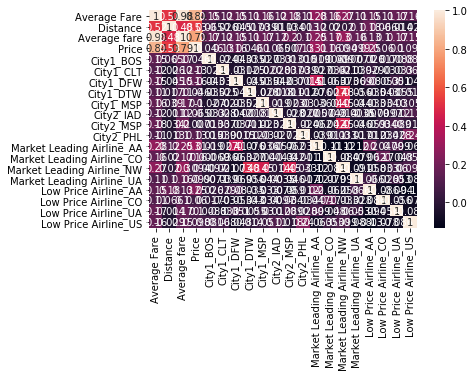

In [255]:
sns.heatmap( df.corr(), annot=True)

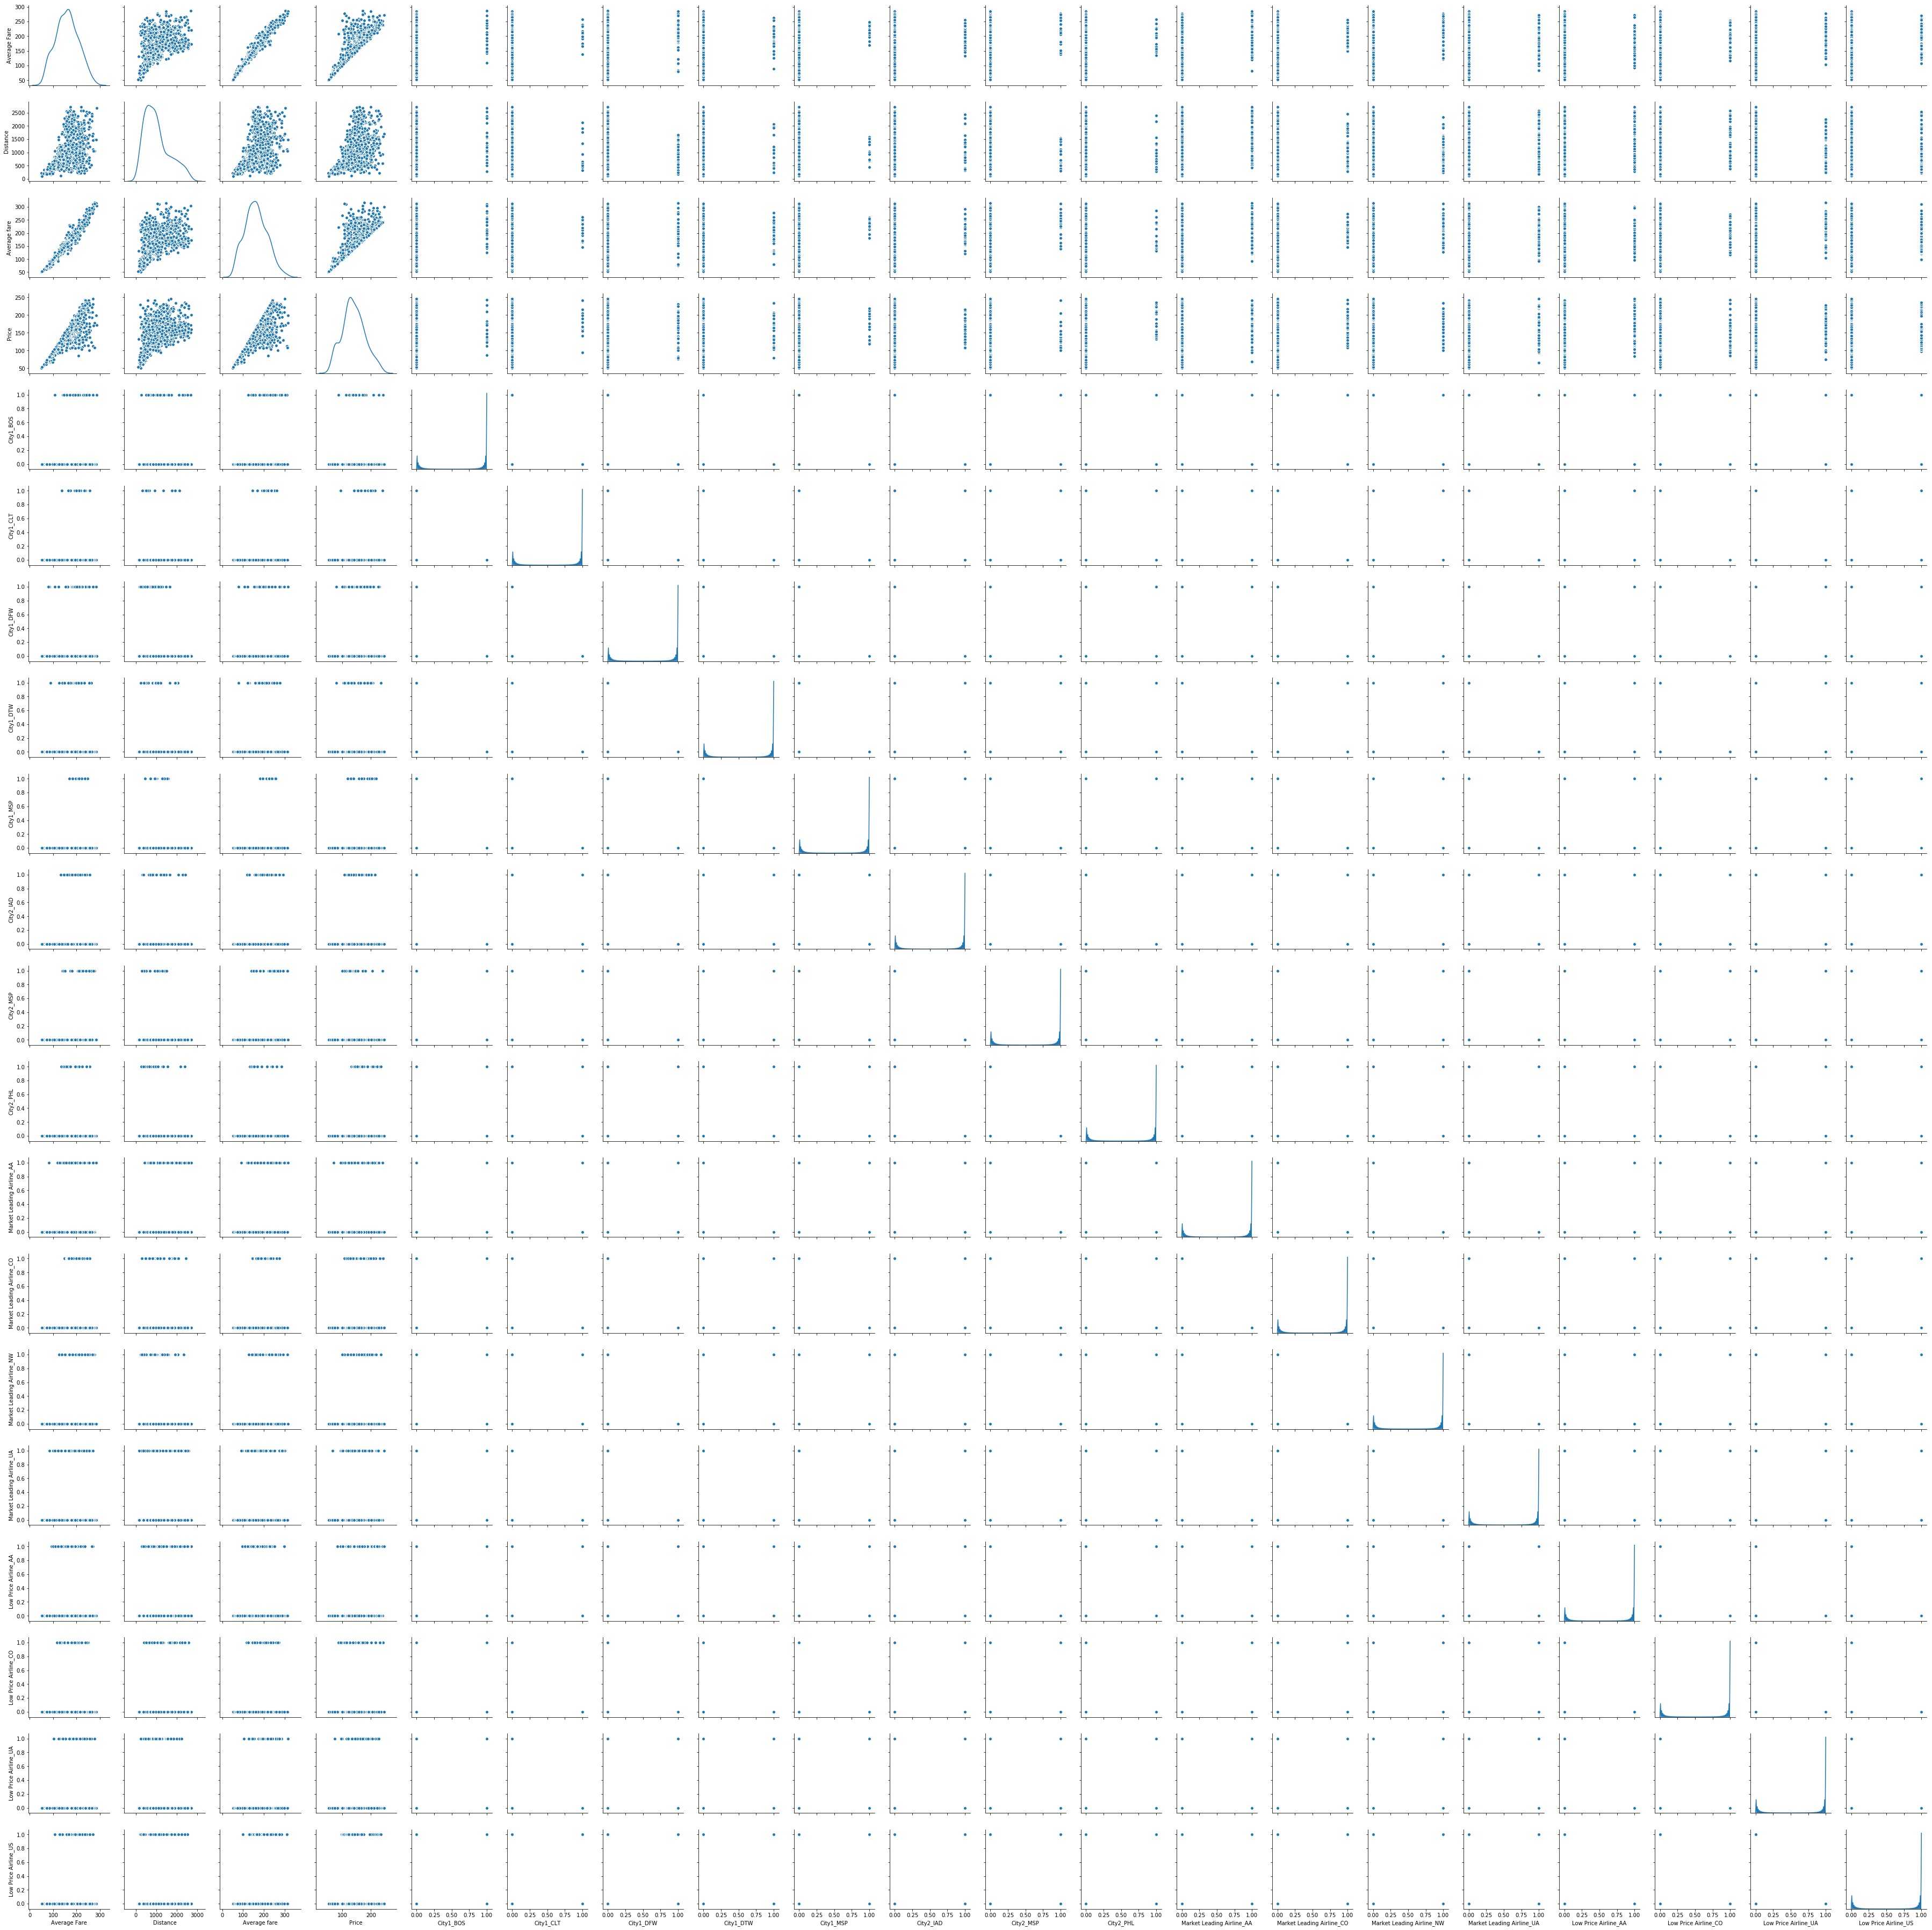

In [256]:
sns.pairplot(df , diag_kind='kde')

In [257]:
#Independent Variables
# Copy all the predictor variables into X dataframe. Since 'Average Fare' is dependent variable drop it
X = df.drop('Average Fare', axis=1)

#Dependent Variable
# Copy the 'Average Fare' column alone into the y dataframe. This is the dependent variable
Y = df[['Average Fare']]

## Dividing the data set into training and test data set and build a Multiple Linear Regression model.

In [258]:
from sklearn.linear_model import LinearRegression

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [259]:
test_size = 0.30 # taking 70:30 training and test set
seed = 1  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [260]:
X_train.shape

(617, 19)

In [261]:
X_test.shape

(265, 19)

## Print the coefficients & intercepts of the linear regression model

In [262]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
print("Intercept: "+str(regression_model.intercept_))
print("Coefficient: "+str(regression_model.coef_))

Intercept: [7.0647077]
Coefficient: [[ 2.38198416e-03  7.56940536e-01  1.95574941e-01  6.04754885e-01
  -2.07291266e-01 -2.71302955e+00  2.90772535e+00  3.39893518e-01
   4.65580624e+00  6.15666577e+00 -6.69675880e-01  2.37315889e+00
  -2.29455254e+00 -1.81615142e+00 -6.75054057e+00  2.24613601e-01
   4.14142943e+00  2.22785657e+00  2.96936133e+00]]


## R-Sqaure

In [263]:
predictedAverageFare = regression_model.predict(X_train)

In [264]:
from sklearn import metrics
mse = metrics.mean_squared_error(predictedAverageFare, y_train)
mse

63.009134722285616

In [265]:
rmse = np.sqrt(mse)
rmse

7.9378293457522515

## Print the accuracy of the overall model

In [266]:
print("Training Score: "+str(regression_model.score(X_train, y_train)))

Training Score: 0.9729990763078478


In [267]:
print("Test Score: "+str(regression_model.score(X_test, y_test)))

Test Score: 0.9758390136333148
